In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data/cleaned.csv")
df.head(1)

,scoutId,regio1,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,hasKitchen,cellar,condition,interiorQual,petsAllowed,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,has_refurbished,floor_division,meter_price
0,96107057,Nordrhein_Westfalen,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,1.0,oil,False,True,well_kept,normal,negotiable,Schüruferstraße,False,4,ground_floor,44269,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,False,0.333333,6.918605


In [3]:
df.set_index('scoutId', inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254498 entries, 96107057 to 110938302
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   regio1              254498 non-null  object 
 1   heatingType         254498 non-null  object 
 2   telekomTvOffer      254498 non-null  object 
 3   newlyConst          254498 non-null  bool   
 4   balcony             254498 non-null  bool   
 5   picturecount        254498 non-null  int64  
 6   pricetrend          254498 non-null  float64
 7   telekomUploadSpeed  254498 non-null  float64
 8   totalRent           254498 non-null  float64
 9   yearConstructed     254498 non-null  float64
 10  noParkSpaces        254498 non-null  float64
 11  firingTypes         254498 non-null  object 
 12  hasKitchen          254498 non-null  bool   
 13  cellar              254498 non-null  bool   
 14  condition           254498 non-null  object 
 15  interiorQual        2544

<AxesSubplot:>

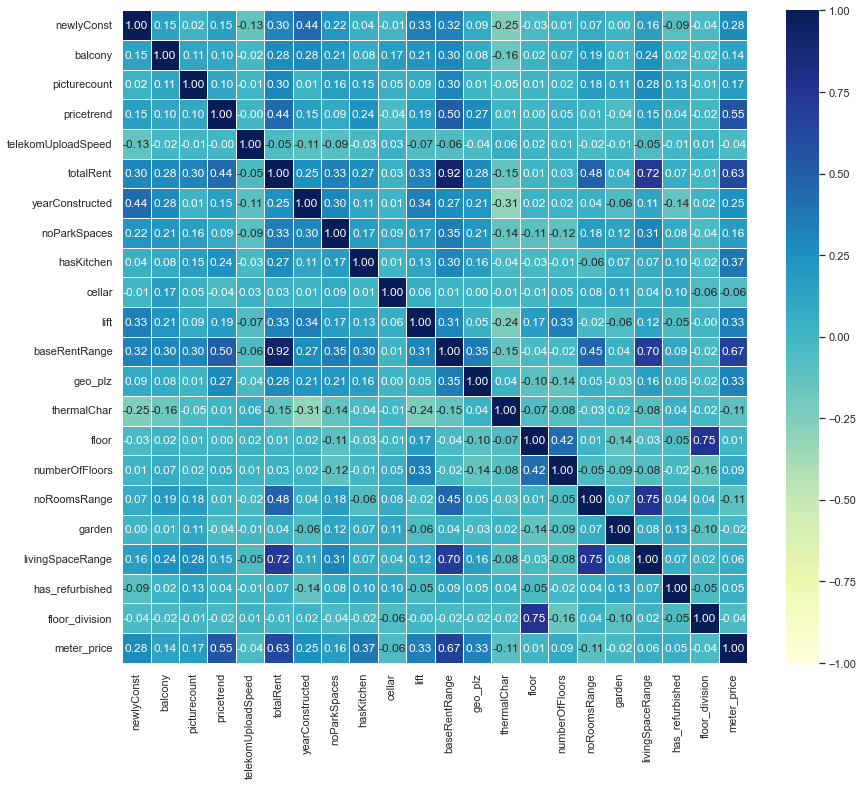

In [4]:
df_corr = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap="YlGnBu", vmin=-1, vmax=1, fmt='.2f')

In [6]:
df_corr['totalRent'].sort_values(ascending=False)

totalRent             1.000000
baseRentRange         0.916361
livingSpaceRange      0.724941
meter_price           0.629279
noRoomsRange          0.476772
pricetrend            0.443289
noParkSpaces          0.329090
lift                  0.325984
picturecount          0.303499
newlyConst            0.302171
geo_plz               0.280045
balcony               0.277264
hasKitchen            0.267914
yearConstructed       0.247293
has_refurbished       0.068132
garden                0.035568
cellar                0.028530
numberOfFloors        0.025012
floor                 0.005899
floor_division       -0.010406
telekomUploadSpeed   -0.047297
thermalChar          -0.146274
Name: totalRent, dtype: float64

In [8]:
df['regio1'].value_counts() / len(df) * 100

Nordrhein_Westfalen       23.833833
Sachsen                   21.515549
Bayern                     7.905583
Sachsen_Anhalt             7.528959
Hessen                     6.484170
Niedersachsen              6.204337
Baden_Württemberg          5.945969
Berlin                     3.731501
Rheinland_Pfalz            3.119536
Thüringen                  3.104315
Brandenburg                2.597337
Schleswig_Holstein         2.509133
Mecklenburg_Vorpommern     2.472836
Hamburg                    1.379262
Bremen                     1.130261
Saarland                   0.537420
Name: regio1, dtype: float64

In [13]:
df['heatingType'].value_counts() / len(df) * 100

central_heating                   48.022824
no_heating                        16.576511
district_heating                   9.162686
gas_heating                        7.464953
self_contained_central_heating     7.160531
floor_heating                      6.559105
oil_heating                        1.899510
heat_pump                          1.029178
combined_heat_and_power_plant      0.749344
night_storage_heater               0.498392
wood_pellet_heating                0.363744
electric_heating                   0.334083
stove_heating                      0.115524
solar_heating                      0.063616
Name: heatingType, dtype: float64

In [15]:
df['telekomTvOffer'].value_counts() / len(df) * 100

ONE_YEAR_FREE    84.714156
NO_INFO          12.108546
NONE              1.833942
ON_DEMAND         1.343356
Name: telekomTvOffer, dtype: float64

In [18]:
df['condition'].value_counts() / len(df) * 100

other                                 25.387942
well_kept                             25.031223
refurbished                           10.020139
fully_renovated                        9.786359
first_time_use                         8.223273
mint_condition                         8.058183
modernized                             6.360841
first_time_use_after_refurbishment     5.796491
negotiable                             0.821547
need_of_renovation                     0.512833
ripe_for_demolition                    0.001171
Name: condition, dtype: float64

In [20]:
df['interiorQual'].value_counts() / len(df) * 100

other            41.864150
normal           30.700481
sophisticated    24.155427
luxury            2.570797
simple            0.709145
Name: interiorQual, dtype: float64

In [21]:
df['petsAllowed'].value_counts() / len(df) * 100

negotiable    76.835894
no            19.348695
yes            3.815412
Name: petsAllowed, dtype: float64

In [22]:
df['typeOfFlat'].value_counts() / len(df) * 100

apartment              62.615524
roof_storey            13.155286
ground_floor           11.705773
other                   3.475084
maisonette              3.430982
raised_ground_floor     2.112995
penthouse               1.259055
terraced_flat           1.241102
half_basement           0.667385
loft                    0.336815
Name: typeOfFlat, dtype: float64

In [46]:
def handle_categorical_vars(df):
    '''
    Apply one hot encoder to nominal variables, maps ordinal variables with custom mapping
    Arguments:
        df is a n-by-d pandas data frame
    Returns:
        the final dataframe 
    '''

    #nominal vars
    df.loc[df['regio1'].isin(['Hamburg', 'Bremen', 'Saarland']), 'regio1'] = 'other'
    df.loc[df['heatingType'].isin(['oil_heating', 'heat_pump', 'combined_heat_and_power_plant',
                                  'night_storage_heater', 'wood_pellet_heating',
                                  'electric_heating', 'stove_heating', 'solar_heating']),
                                  'heatingType'] = 'other'
    df.loc[df['typeOfFlat'].isin(['half_basement', 'loft']), 'typeOfFlat'] = 'bad_flat'

    cols = ['regio1', 'heatingType', 'typeOfFlat']
    dummy_df = pd.get_dummies(df[cols])
    df = pd.concat([df, dummy_df], axis=1)
    df.drop(cols, inplace=True, axis=1)

    #ordinal vars
    telekomTvOffer_dict = {
        'ONE_YEAR_FREE': 2,
        'NO_INFO':1,
        'NONE':0,              
        'ON_DEMAND':1,         
    }
    df['telekomTvOffer'] = df.telekomTvOffer.map(telekomTvOffer_dict)
    
    condition_dict = {
        'other': 2,                                 
        'well_kept': 3,                             
        'refurbished': 1,                           
        'fully_renovated': 3,                        
        'first_time_use': 4,                         
        'mint_condition': 4,                         
        'modernized': 5,                              
        'first_time_use_after_refurbishment': 2,     
        'negotiable': 2,                             
        'need_of_renovation': 0,                     
        'ripe_for_demolition': 0,                    
    }
    df['condition'] = df.condition.map(condition_dict)

    interiorQual_dict = {
        'other': 1,            
        'normal': 2,           
        'sophisticated': 0,    
        'luxury': 3,            
        'simple': 1,           
    }
    df['interiorQual'] = df.interiorQual.map(interiorQual_dict)

    petsAllowed_dict = {
        'negotiable': 1,    
        'no': 0,            
        'yes': 2,            
    }
    df['petsAllowed'] = df.petsAllowed.map(petsAllowed_dict)
                    
    return df

In [47]:
df = handle_categorical_vars(df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256224 entries, 96107057 to 110938302
Data columns (total 62 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   telekomTvOffer                              256224 non-null  int64  
 1   newlyConst                                  256224 non-null  bool   
 2   balcony                                     256224 non-null  bool   
 3   picturecount                                256224 non-null  int64  
 4   pricetrend                                  256224 non-null  float64
 5   telekomUploadSpeed                          256224 non-null  float64
 6   totalRent                                   256224 non-null  float64
 7   yearConstructed                             256224 non-null  float64
 8   noParkSpaces                                256224 non-null  float64
 9   firingTypes                                 256224 non-null 

In [31]:
len(df.pricetrend.unique())

1229

#### Convert dtypes and reduce memory usage

In [48]:
# From : https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/

def reduce_mem_usage(df, int_cast=True, obj_to_category=False, subset=None):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    :param df: dataframe to reduce (pd.DataFrame)
    :param int_cast: indicate if columns should be tried to be casted to int (bool)
    :param obj_to_category: convert non-datetime related objects to category dtype (bool)
    :param subset: subset of columns to analyse (list)
    :return: dataset with the column dtypes adjusted (pd.DataFrame)
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2;
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and col_type.name not in ['category', 'bool'] and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()

            # test if column can be converted to an integer
            treat_as_int = str(col_type)[:3] == 'int'

            if treat_as_int:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:4] == 'uint':
                pass
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name and obj_to_category:
            df[col] = df[col].astype('category')
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [49]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 59.46 MB
Memory usage after optimization is: 30.339 MB
Decreased by 49.0%


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256224 entries, 0 to 256223
Data columns (total 63 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   scoutId                                     256224 non-null  int32  
 1   telekomTvOffer                              256224 non-null  int8   
 2   newlyConst                                  256224 non-null  bool   
 3   balcony                                     256224 non-null  bool   
 4   picturecount                                256224 non-null  int8   
 5   pricetrend                                  256224 non-null  float16
 6   telekomUploadSpeed                          256224 non-null  float16
 7   totalRent                                   256224 non-null  float16
 8   yearConstructed                             256224 non-null  float16
 9   noParkSpaces                                256224 non-null  float16
 

In [50]:
df.to_csv("data/encoded.csv")